# Vladimir Bliznyukov v.bliznyukov@innopolis.university

# Task 1

## Preprocess and visualize the dataset

In [39]:
#import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
# read dataset
dataset = pd.read_csv('task1_dataset.csv')
# sort rows of dataset in ascending order of '0' column (or datetime)
dataset = dataset.sort_values(['0'], ascending=True)

# replace values of datetime column by integers from 0 to len(dataset)
counter = 0
for i in dataset.index:
    dataset.at[i, '0'] = counter
    counter+=1

# import dataset full 
dataset_full = pd.read_csv('task1_dataset_full.csv')
dataset_full = dataset_full.sort_values(['datetime'], ascending=True)

## Plot features of the dataset

As all features are ***independent***, we can plot them separately on 3 plots with datetime on x axis and feature-i on y-axis

In [41]:
# import matplotlib library
import matplotlib.pyplot as plt

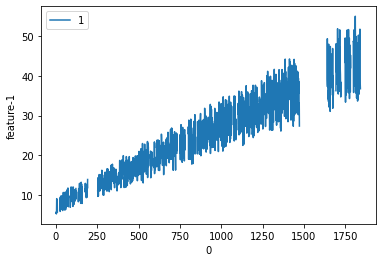

In [42]:
# plot feature 1
dataset.plot(x='0', y='1', xlabel='0', ylabel='feature-1')

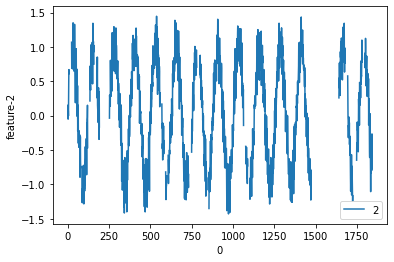

In [43]:
# plot feature 2
dataset.plot(x='0', y='2', xlabel='0', ylabel='feature-2')

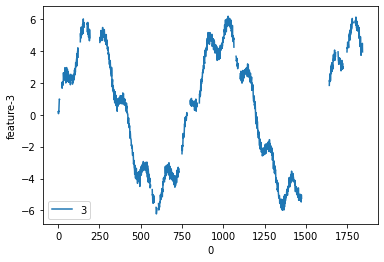

In [44]:
# plot feature 3
dataset.plot(x='0', y='3', xlabel='0', ylabel='feature-3')

In [45]:
# organising data for feature 1
# get x_train input (same for 3 feature dataset)
x_train = dataset.loc[:,'0'].values.reshape(-1,1)

# create separate dataset for feature 1
y_train_f1 = dataset.loc[:, '1'].values.reshape(-1,1)
df1 = np.hstack((x_train, y_train_f1))
df1 = pd.DataFrame(df1, columns = ['0','1'])

# create separate dataset for feature 2
y_train_f2 = dataset.loc[:, '2'].values.reshape(-1,1)
df2 = np.hstack((x_train, y_train_f2))
df2 = pd.DataFrame(df2, columns = ['0','2'])

# create separate dataset for feature 3
y_train_f3 = dataset.loc[:, '3'].values.reshape(-1,1)
df3 = np.hstack((x_train, y_train_f3))
df3 = pd.DataFrame(df3, columns = ['0','3'])


## Using different degree regression models to predict missing values

In [46]:
# import necessary libraries for polynomial regression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Creating functions

Function **def** **impute_data**(**dataset**, ***feature***, ***degree***) returns 2 arrays:
1.  datetime ('0') values for which ***feature*** is NaN.
2.  corresponding predicted **feature** values obtained with specified polynomial **degree**.
***Dataset*** is comprised of 2 columns: datetime and feature (created on previous step) 


In [47]:
def impute_data(dataset, feature, degree):
        #create polynomial features for specified degree
        polynomial_features = PolynomialFeatures(degree)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                            ("linear_regression", linear_regression)])

        # creating dataset of rows with nan feature values
        nan_values = dataset[dataset[feature].isna()]

        # get '0' column of nan_values dataset (used later to predict missing values using LR model)
        nan_values_x = nan_values.loc[:,'0'].values.reshape(-1,1)

        # creating dataset of rows with existing feature values
        has_values = dataset.dropna(subset=[feature])
        
        # Train model on such dataset
        x_train_not_nan = has_values.loc[:, '0'].values.reshape(-1,1)
        y_train_not_nan = has_values.loc[:, feature].values.reshape(-1,1)
        
        # fit the parameters
        pipeline.fit(x_train_not_nan, y_train_not_nan)

        # predict misssing values of the feature (before we saved particular rows of '0' with missing feature value)
        y_pred = pipeline.predict(nan_values_x)
        return nan_values_x, y_pred

Function **def** **get_imputed**(**dataset**, ***feature***) prints a scatter plot of 10 plots of a feature. Each plot is plotting available points + imputed points with a specified degree polynomial (in different color)

In [48]:
def get_imputed(dataset, feature):
    # plot initial dataset with missing values
    dataset.plot(x='0', y=feature, title = "Initial dataset",xlabel = '0', ylabel='feature '+feature)
    plt.figure(figsize=(20, 7))
    # label for the whole plot
    plt.suptitle("Polynomial regression visualization from 1 till 10 degrees", fontsize=16)
    for i in range(1,11):
        ax = plt.subplot(2, 5, i)
        ax.set_title("{} degree polynomial".format(i))
        # labels for axis
        ax.set_xlabel('0')
        ax.set_ylabel(feature)
        # get imputed values from impute_data function
        nan_values_x, y_pred = impute_data(dataset, feature, i)
        # plot
        ax.scatter(dataset['0'], dataset[feature], marker ='|')
        ax.scatter(nan_values_x, y_pred, marker ='|')
    plt.show() 

Function **def** **get_mse_imputed**(**dataset_full**,**dataset_full**, ***feature***).
 Plot change of MSE for each degree for all features. (MSE between imputed dataset and ground truth one)

In [49]:

def get_mse_for_imputed(dataset_full, dataset, feature):
    x = []
    y = []
    min_error = 0
    min_error_degree = 0
    for i in range(10):
        # get imputed data of feature for missing values 
        nan_values_x, y_pred = impute_data(dataset, feature, i+1)
        # get true values (mse will be calculated only on imputed data since other non-imputed values will give 0 error)
        y_true = dataset_full[dataset[feature].isna()].loc[:, 'feature'+feature].values.reshape(-1,1)
        # mse calculated
        mse = metrics.mean_squared_error(y_true, y_pred)
        x.append(i+1)
        y.append(mse)
        # loop to remembe minimal error and the degree it was obtained with
        if min_error >= mse or i == 0:
          min_error = mse
          min_error_degree = i+1
    plt.title("MSE graph")
    plt.xlabel("Polynomial degree")
    plt.ylabel("Error")
    plt.plot(x, y)
    print("min_error: ", min_error)
    print("min_error_degree: ", min_error_degree)
    plt.show() 

## Plot change of MSE for each degree for all features

min_error:  20.484690276558215
min_error_degree:  5


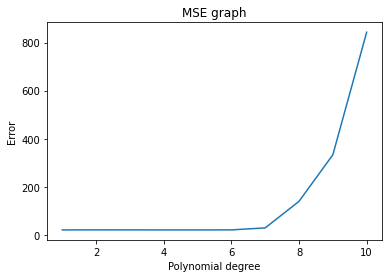

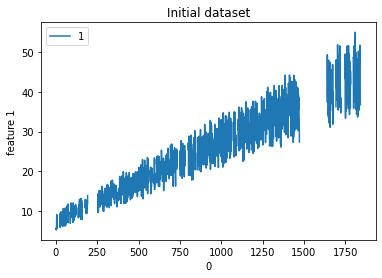

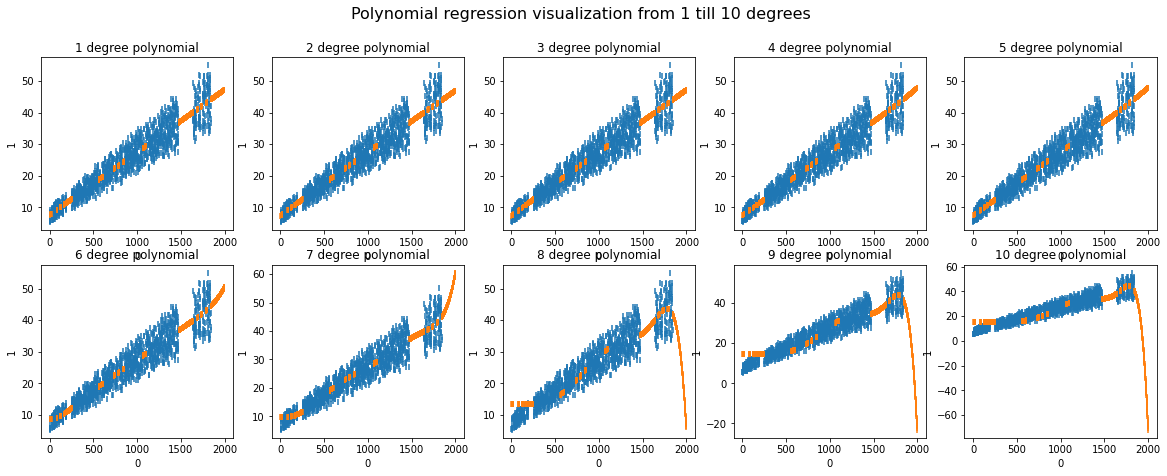

In [50]:
# print mse graph
get_mse_for_imputed(dataset_full, df1, '1')
# print plots for imputed data from degree 1 to 10
get_imputed(df1,'1')

min_error:  0.6393243768607544
min_error_degree:  1


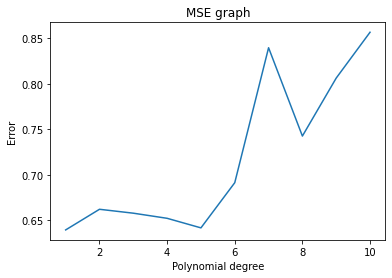

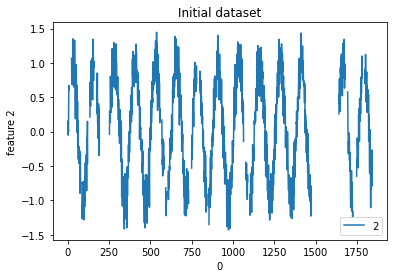

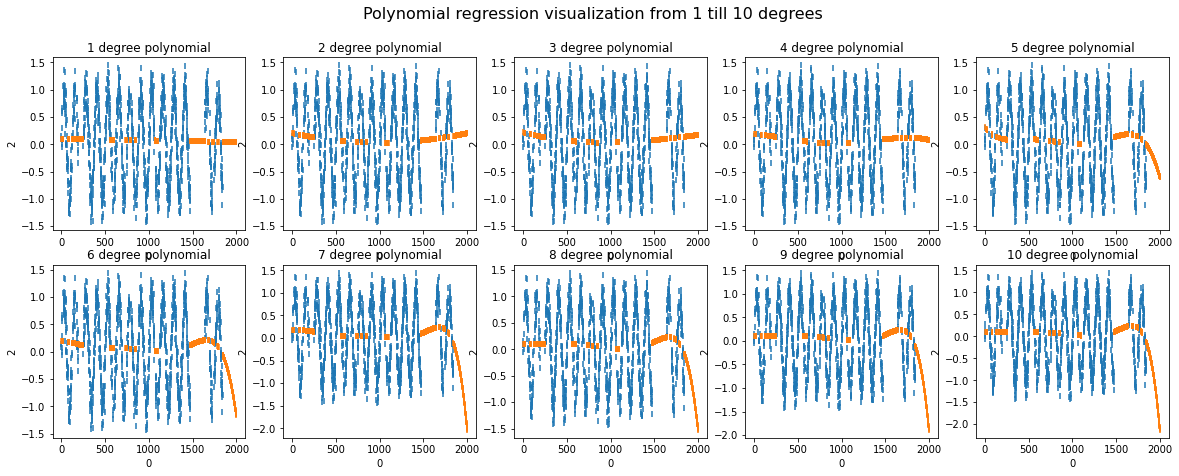

In [51]:
# print mse graph
get_mse_for_imputed(dataset_full, df2, '2')
# print plots for imputed data from degree 1 to 10
get_imputed(df2,'2')


min_error:  8.548827683679077
min_error_degree:  2


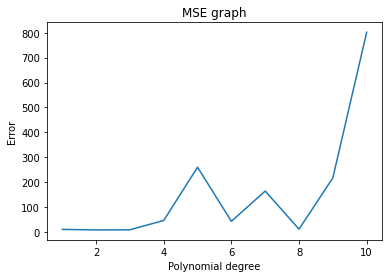

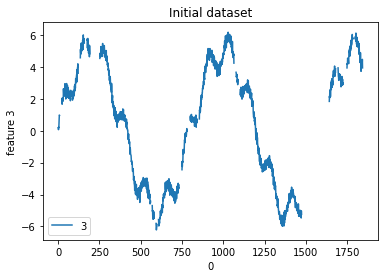

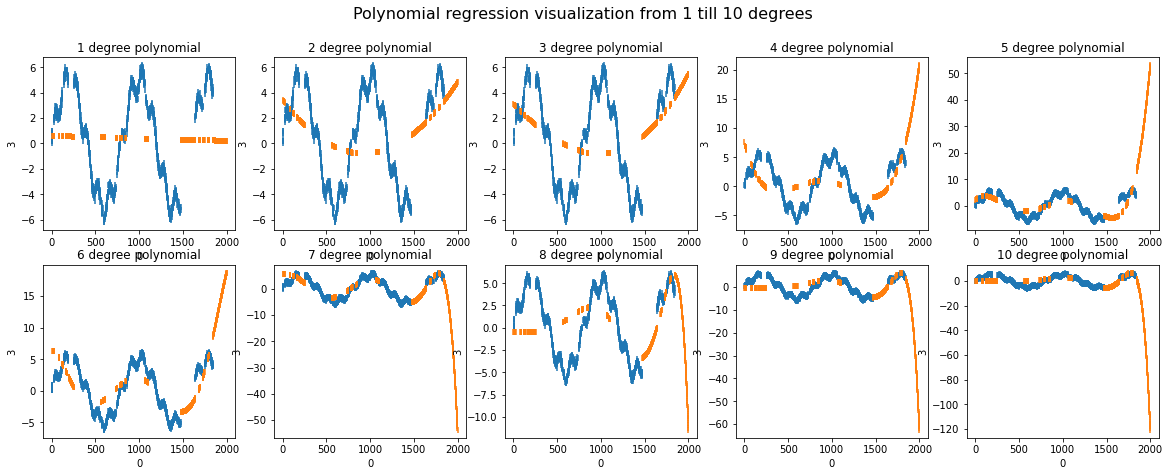

In [52]:
# print mse graph
get_mse_for_imputed(dataset_full, df3, '3')
# print plots for imputed data from degree 1 to 10
get_imputed(df3,'3')

## Ideas on why these degrees best describe particular feature

###Feature 1:

As you can see in the first feature plot, mse is almost same (around 20) for degrees from 1 to 5.However, starting from degree 8 the mse blows up meaning that the model overfits the data. 
The best degree is 5. However, the function seems linear and mse for degree 1 is almost same. This misinterpretation may be the result of the noise in the dataset. 

###Feature 2:


From the feature2 mse plot we can observe that 1st degree polynomial gives the best results. However, 5 dergee polynomial also producing low error. 
The true function resembles sin function in a form *asin(bx)*. And perhaps, polynomial regression predicts the taylor series expansion for our model. This indeed works perfectly with lower degrees, however, with higher order we come to high error and overfitting.

###Feature 3:

Feature3 function resembles sin as well. This is seen clearly from the scatterplots of different degree polymonials. For example, 5, 7, 9 degrees are very close to the function as it is taylor expansion of sin (odd degree polynomial). These models indeed fit well to the train data, but overfit the test data at the end. 

To sum up all the reasonings above, it is important not to fit as much as possible to the train dataset, since complexity of a model may result in overfitting and high mse for test dataset. This is a visual example of bias-variance tradeoff.

# Task 2

## Dataset load

In [60]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
# name columns and load the dataset
headers = ["Checking", "Duration", "History", "Purpose", "Amount",
           "Savings", "Employed", "Installment", "Marital",
           "Other", "Residence", "Property", "Age","Other plans", "Housing",
           "Credits#", "Job", "Liable", "Telephone",
           "Foreign","Approved"]
dataset = pd.read_csv('GermanData.csv', header=None, names=headers)

In [ ]:
# check for null values
dataset.isna().sum()

Checking       0
Duration       0
History        0
Purpose        0
Amount         0
Savings        0
Employed       0
Installment    0
Marital        0
Other          0
Residence      0
Property       0
Age            0
Other plans    0
Housing        0
Credits#       0
Job            0
Liable         0
Telephone      0
Foreign        0
Approved       0
dtype: int64

In [ ]:
# now we can explore all the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Checking     1000 non-null   object
 1   Duration     1000 non-null   int64 
 2   History      1000 non-null   object
 3   Purpose      1000 non-null   object
 4   Amount       1000 non-null   int64 
 5   Savings      1000 non-null   object
 6   Employed     1000 non-null   object
 7   Installment  1000 non-null   int64 
 8   Marital      1000 non-null   object
 9   Other        1000 non-null   object
 10  Residence    1000 non-null   int64 
 11  Property     1000 non-null   object
 12  Age          1000 non-null   int64 
 13  Other plans  1000 non-null   object
 14  Housing      1000 non-null   object
 15  Credits#     1000 non-null   int64 
 16  Job          1000 non-null   object
 17  Liable       1000 non-null   int64 
 18  Telephone    1000 non-null   object
 19  Foreign      1000 non-null  

In [ ]:
dataset.head(5)

,Checking,Duration,History,Purpose,Amount,Savings,Employed,Installment,Marital,Other,Residence,Property,Age,Other plans,Housing,Credits#,Job,Liable,Telephone,Foreign,Approved
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [62]:
# replace 2 with 1 and 1 with 0 in the approved column (needed for logistic regression)
# 1 - approved
# 0 - not approved
dataset['Approved'] = dataset['Approved'].replace([2,1],[1,0])

## Data preparation and scaling

### Categorical feature transform

Most of 13 categorical features seem to be non ordinal. We can use one-hot encoding. However, I want to explore Employed, Job and History columns i.e. correlation feature values and the growth of approved/not approved cases. 

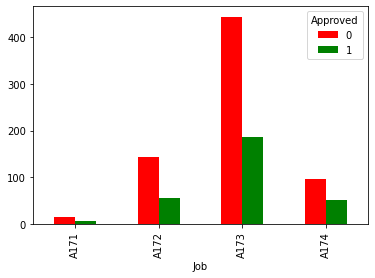

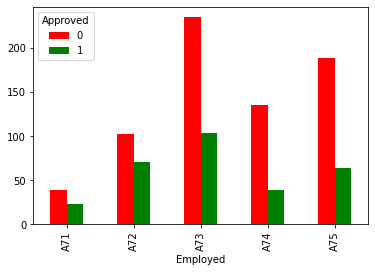

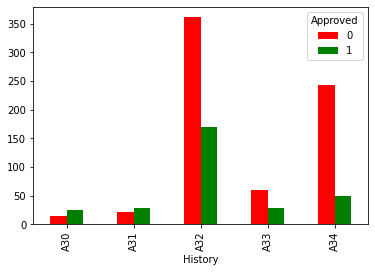

In [63]:
features_ordinal = ['Job', 'Employed', 'History']
for feature in features_ordinal:
    CrossTabResult=pd.crosstab(index=dataset[feature], columns=dataset['Approved'])
    CrossTabResult.plot.bar(color=['red','green'])

Therefore, Employed can be interpreted as an ordinal value, whereas Job and History graphs have no clear growth or decay, they can be one-hot encoded.

In [64]:
dataset['Employed'] = dataset['Employed'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5})

In [65]:
# Transform binary features (Foreign, Telephone) to 0 or 1
dataset['Foreign'] = np.where(dataset['Foreign'].str.contains('A201'), 1, 0)
dataset['Telephone'] = np.where(dataset['Telephone'].str.contains('A192'), 1, 0)

# Other features preliminary do not have any ordinality (not clear, what is better/worse), 
# therefore they can be one-hot-encoded
dataset=pd.get_dummies(dataset)

### Numerical features scaling

Let us explore distibution of numerical features, and check them for noisy data. This will help to choose appropriate scaling method

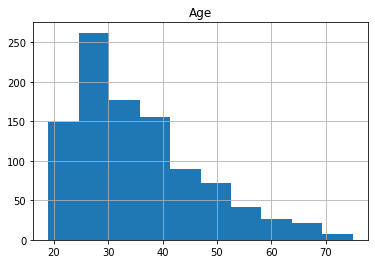

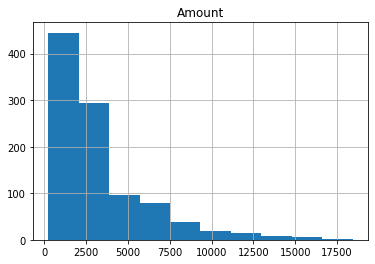

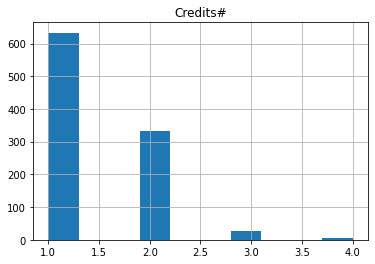

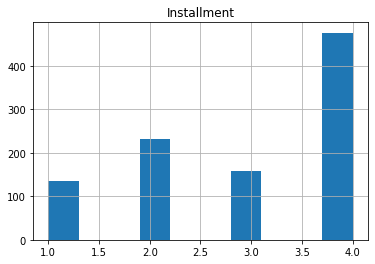

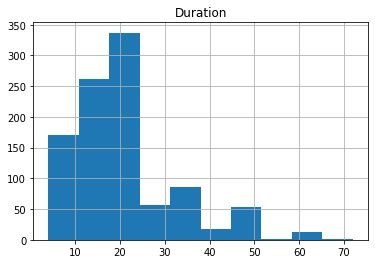

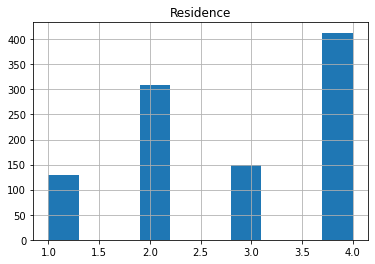

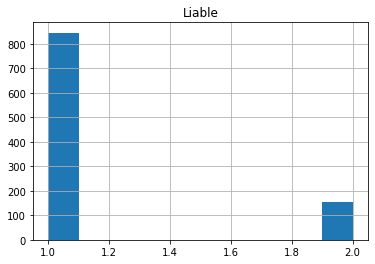

In [66]:
numerical_features = ['Age', 'Amount', 'Credits#', 'Installment', 'Duration', 'Residence', 'Liable']

for feature in numerical_features:
    dataset.hist(feature)

From the graphs above we can conclude that minmax scaler is bad for Amount feature, since there are a small number of very high values (17500). Thus, the MinMaxScaler will produce skewed scaling.

However, Amount, Age, Credits# resemble a normal distribution, so the StandardScaler can be applied on them.

As for Installment, Residence and Liable, the range of values is quite small and distribution is not normal. So the MinMaxScaler (or no Scaler) can be applied.

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
dataset['Amount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Duration'] = scaler.fit_transform(dataset['Duration'].values.reshape(-1,1))
dataset['Age'] = scaler.fit_transform(dataset['Age'].values.reshape(-1,1))

scaler = MinMaxScaler()
dataset['Residence'] = scaler.fit_transform(dataset['Residence'].values.reshape(-1,1))
dataset['Credits#'] = scaler.fit_transform(dataset['Credits#'].values.reshape(-1,1))
dataset['Employed'] = scaler.fit_transform(dataset['Employed'].values.reshape(-1,1))
dataset['Installment'] = scaler.fit_transform(dataset['Installment'].values.reshape(-1,1))
dataset['Liable'] = scaler.fit_transform(dataset['Liable'].values.reshape(-1,1))

dataset.describe()

,Duration,Amount,Employed,Installment,Residence,Age,Credits#,Liable,Telephone,Foreign,Approved,Checking_A11,Checking_A12,Checking_A13,Checking_A14,History_A30,History_A31,History_A32,History_A33,History_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_A61,Savings_A62,Savings_A63,Savings_A64,Savings_A65,Marital_A91,Marital_A92,Marital_A93,Marital_A94,Other_A101,Other_A102,Other_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other plans_A141,Other plans_A142,Other plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,1.332268e-16,7.771561e-17,0.596000,0.657667,0.615000,3.597123e-17,0.135667,0.155000,0.404000,0.963000,0.300000,0.274000,0.269000,0.063000,0.394000,0.040000,0.049000,0.530000,0.088000,0.293000,0.234000,0.103000,0.01200,0.181000,0.280000,0.01200,0.022000,0.050000,0.009000,0.097000,0.603000,0.103000,0.063000,0.048000,0.18300,0.050000,0.310000,0.54800,0.092000,0.907000,0.041000,0.052000,0.282000,0.23200,0.332000,0.154000,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,1.000500e+00,1.000500e+00,0.302077,0.372905,0.367906,1.000500e+00,0.192551,0.362086,0.490943,0.188856,0.458487,0.446232,0.443662,0.243085,0.488879,0.196057,0.215976,0.499349,0.283437,0.455366,0.423584,0.304111,0.10894,0.385211,0.449224,0.10894,0.146757,0.218054,0.094488,0.296106,0.489521,0.304111,0.243085,0.213873,0.38686,0.218054,0.462725,0.49794,0.289171,0.290578,0.198389,0.222138,0.450198,0.42232,0.471167,0.361129,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,-1.402415e+00,-1.070865e+00,0.000000,0.000000,0.000000,-1.455261e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,-7.386675e-01,-6.754833e-01,0.500000,0.333333,0.333333,-7.516417e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,-2.408572e-01,-3.373443e-01,0.500000,0.666667,0.666667,-2.239269e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,2.569531e-01,2.484620e-01,1.000000,1.000000,1.000000,5.676451e-01,0.333333,0.000000,1.000000,1.000000,

### PCA (Dimentionality reduction)

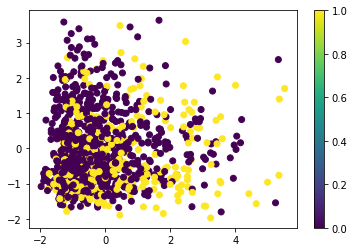

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
predictors_scaled = dataset.drop(columns=['Approved'])
pca.fit(predictors_scaled)
x_pca = pca.transform(predictors_scaled)
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['Approved'])
plt.colorbar()

### Highly Correlated Features

In [69]:
cormatrix = dataset.corr()
cormatrix.style.background_gradient(cmap="coolwarm")

There are some highly correlated features.


*   History and Credits# - **0.501364**
*   Job and Amount - **0.319715**
*   Amount and Duration - **0.624984**
*   Approved and Checking - **(-0.322436)**

---



This is not good for a regression model, because high covariance between features implies high variance\
of the model.
Variance introduces the amount by which the model would change if we used different training dataset.\
Thus, with high variance the model is very sensitive to data.And may produce diverse models for slight\
changes in training set. It means that the model might not perform well with test data.

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
# get features set (all columns except for 'Approved' column)
X = dataset.drop(columns=['Approved'])
# get response set 
y = dataset['Approved']

# split into 70% - train, 30% - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

* **compute_pol_feature(X_train, x_test, degree)** function takes train and test sets and returns their polynomials of a specified degree
* **compute_lr(X_train, x_test, y_train, degree)** function returns the predicted response values of test set

In [72]:
def compute_pol_feature(X_train, x_test, degree):
    # name all numerical columns
    columns = ['Duration','Amount','Employed','Installment','Residence','Age','Credits#', 'Liable']

    # separate train set into numerical and non_numerical features
    X_train_numerical = X_train[columns]
    X_train_non_numerical = X_train.drop(columns=columns)
    
    # for numerical features apply PolynomialFeatures
    poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
    X_train_polynom = pd.DataFrame(poly.fit_transform(X_train_numerical))
    # concatenate polynomial numerical features with one-hot encoded ones
    # get resulting training set
    X_train_new = pd.DataFrame(np.hstack([X_train_polynom,X_train_non_numerical]))
    
    # separate test set into numerical and non_numerical features
    x_test_numerical = x_test[columns]
    x_test_non_numerical = x_test.drop(columns=columns)
    
    x_test_polynom = pd.DataFrame(poly.fit_transform(x_test_numerical))
    x_test_new = pd.DataFrame(np.hstack([x_test_polynom,x_test_non_numerical]))
    
    # return resulting train and test set
    return X_train_new, x_test_new

def compute_lr(X_train, x_test, y_train, degree):
    # Apply polynomial features to training/test sets
    X_train_new, x_test_new = compute_pol_feature(X_train, x_test, degree)
    # Make a regression model
    lr = LogisticRegression(max_iter = 1000000000)
    lr.fit(X_train_new,y_train)
    # predict y based on test set
    y_pred = lr.predict(x_test_new)
    return y_pred

* **calculate_mse(degrees)** function takes range of degrees and calculates mse for each degree polynomial in logistic regression


In [73]:
def calculate_mse(degrees):
  fig, axs = plt.subplots(2)
  train_error = []
  test_error = []
  f1_score = []
  x = []
  # I have decided to keep best F1 score
  best_f1 = 0
  best_degree = 0
  for i in range(1, degrees+1):
    # get y test predicted
    y_pred = compute_lr(X_train, X_test, y_train, i)
    # get y train predicted
    y_train_pred = compute_lr(X_train, X_train, y_train, i)
    x.append(i)
    # calculate train and test mse, append them to the list
    train_error.append(metrics.mean_squared_error(y_train, y_train_pred))
    test_error.append(metrics.mean_squared_error(y_test, y_pred))
    # update minimum F1
    f1_score.append(metrics.f1_score(y_test, y_pred, pos_label=0))
    if i == 1 or f1_score[i-1] >= best_f1:
      best_f1 = f1_score[i-1]
      best_degree = i
  # plot graphs
  axs[0].plot(x, train_error, label='train')
  axs[0].plot(x, test_error, label='test')
  axs[0].legend()
  # plot f1 score graph
  axs[1].plot(x, f1_score, label='f1_score')
  axs[1].legend()
  print("Best f1_score is {} for degree {}".format(best_f1, best_degree))

Best f1_score is 0.8475336322869955 for degree 2


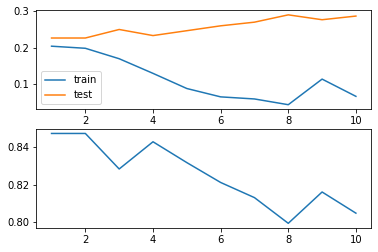

In [ ]:
calculate_mse(10)

The best degree for our model is 2.
* Has lowest test and training error (closest possible)
* Has best F1 score\
As you can see, the test error decreases a bit at the beginning,\
but starts to grow from degree 3, even though the training error approaches 0.\
This is exaclty bias-variance principle, where we a facing a trade-off between flexibility of a model (bias) and low variance.
Now we can apply cross validation and other parameters to tune our model.

In [74]:
from sklearn.model_selection import GridSearchCV
grid={
    # set possible parameters (specified in the assignment)
    "C":np.logspace(4,4,20), 
    "penalty":["l1","l2"],
    "solver":["liblinear", "lbfgs"]}

lr = LogisticRegression(max_iter = 10000)
lr_cv = GridSearchCV(lr,grid,cv=10)
# get test and train set polynomials
X_train_new, x_test_new = compute_pol_feature(X_train, X_test, 2)
# fit
lr_cv.fit(X_train_new,y_train)
# predict y
y_pred = lr_cv.predict(x_test_new)
print("F1 score: {}".format(metrics.f1_score(y_test, y_pred, pos_label=0)))
print("Tuned hyperparameters :(best parameters) ",lr_cv.best_params_)

F1 score: 0.8551724137931034
Tuned hyperparameters :(best parameters)  {'C': 10000.0, 'penalty': 'l1', 'solver': 'liblinear'}


As you can see, CV gave us better F1 score, which means our model performs better now.\
The hyperparameters that provided such score are:
* 'C': 10000.0
* 'penalty': 'L1'
* 'solver': 'liblinear'

##Males/Females prediction accuracy

In [75]:
# create a test set from X_test and y_test
test_resp = pd.Index(['Approved'])
test_features = X.columns.append(test_resp)
dataset_test = pd.DataFrame(np.hstack([X_test,y_test[:, np.newaxis]]), columns = test_features)

# get all males from the test set
dataset_males = dataset_test[dataset_test['Marital_A91'] + dataset_test['Marital_A93'] + dataset_test['Marital_A94'] >= 1]
dataset_males_x = dataset_males.drop(columns=['Approved'])
dataset_males_y = dataset_males['Approved']

# get all females from the test set
dataset_females = dataset_test[dataset_test['Marital_A92'] == 1]
dataset_females_x = dataset_females.drop(columns=['Approved'])
dataset_females_y = dataset_females['Approved']

print('# of males:{}'.format(dataset_males.shape[0]))
print('# of females:{}'.format(dataset_females.shape[0]))
print('#--------------#')

# here we create 2 degree feature for both males a females set
X_train_new, dataset_males_pol = compute_pol_feature(X_train, dataset_males_x, 2)
X_train_new, dataset_females_pol = compute_pol_feature(X_train, dataset_females_x, 2)

dataset_females_pred = lr_cv.predict(dataset_females_pol)
print("F1 score for female: {}".format(metrics.f1_score(dataset_females_y, dataset_females_pred,pos_label=0)))
print("Accuracy for females: {}".format(metrics.accuracy_score(dataset_females_y, dataset_females_pred)))

dataset_males_pred = lr_cv.predict(dataset_males_pol)
print("F1 score for male: {}".format(metrics.f1_score(dataset_males_y, dataset_males_pred,pos_label=0)))
print("Accuracy for males: {}".format(metrics.accuracy_score(dataset_males_y, dataset_males_pred)))

# of males:212
# of females:88
#--------------#
F1 score for female: 0.8548387096774194
Accuracy for females: 0.7954545454545454
F1 score for male: 0.855305466237942
Accuracy for males: 0.7877358490566038


The accuracy for both males and females is almost the same.\
Females have ~1.5% lower, perhaps, because the number of females in the dataset\
is almost 3 times less. What I want to explore is the recall of the model.

In [76]:
print("Recall for males: {}".format(metrics.recall_score(dataset_males_y, dataset_males_pred)))
print("Recall for females: {}".format(metrics.recall_score(dataset_females_y, dataset_females_pred)))

Recall for males: 0.5483870967741935
Recall for females: 0.5862068965517241


Therefore females are more likely to be approved for a credit

Let us explore the distribution of Marital column (A92 - Females)

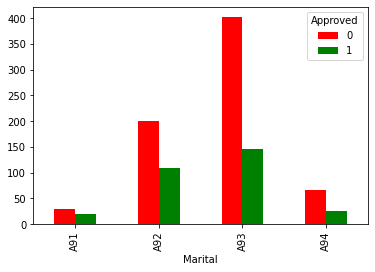

In [31]:
CrossTabResult=pd.crosstab(index=dataset['Marital'], columns=dataset['Approved'])
CrossTabResult.plot.bar(color=['red','green'])

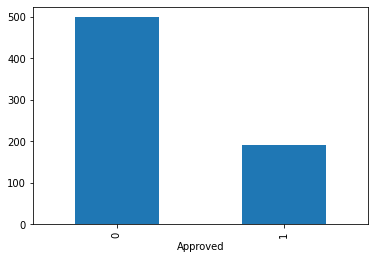

In [36]:
# explore the proportion of approved cases for males
dataset_all_males = dataset[dataset['Marital_A91'] + dataset['Marital_A93'] + dataset['Marital_A94'] >= 1].groupby('Approved').size()
dataset_all_males.plot(kind='bar')

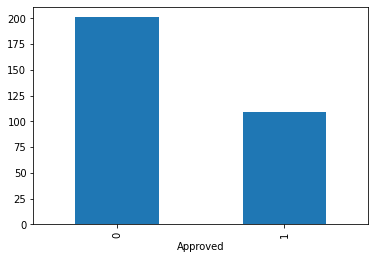

In [38]:
# explore the proportion of approved cases for females
dataset_all_females = dataset[dataset['Marital_A92'] == 1].groupby('Approved').size()
dataset_all_females.plot(kind='bar')

Conclusion: females tend to be less incorrectly disappoved (less false negatives in recall), than males.
From cross tab result is is seen that approval rate for both sexes is somewhere around 50%.\
However, closer look at each sex separately gives much clearer picture.
Females in the dataset have higher approval percentage, than males:**55%** compared to **40%**.\
However, the train dataset may contain a bit different distibution (some flactuation in proportions), but the overall picture should stay same.\
Our model - trained on such distibution - indeed reflects the same tendency in the test data. 